# Data analysis of patients data

@ Liubov

Here we show example of how to analyze some data.
You can find a first analysis of some of random sample of data and the corresponding open-sourced code on github.

**Disclaimer:** here data are generated from the dynamical system. If you have interesting open data sample, please contact me for any other suggestion or info at liubov.tupikina@cri-paris.org



# Main steps and table of content


The idea of notebook is to show how one can:
1. [Loading data](#load-data)or generating random sample of data
2. [Visualizing time series data](#visualise) using standard or spectral approaches 
3. [Moving average, Rolling windows](#moveav)
4. [Seasonality, Frequencies, Trends in data time-series](#trend) on detection of seasonality applying simple Fourier transform
5. [Autocorrelation](#autocor) autocorrelation analysis in order to detect memory effects
6. [Correlation vs. causation](#correlation) applicable to several time-series in order to detect similarities and "causes"


# 1. Load data  <a name="load-data"></a>

First let us load the data or generate random sample of data. In this case the data will be simply time-series, series of data points indexed in time-order $P_i(t)$, where $i\in[1,4]$. We just simply load csv data file with time-series and parameters.  

We have several columns in our data, consider the first column with variable $P_1$ ordered in time for time $T=1000.$ Let's load this file.


In [76]:

import pickle
import numpy as np
import csv
import datetime
import pandas as pd
import os, os.path
import re

# Load data from file 
filepath = "data_random_series.txt"

# Create the dataframe where everything will be stored
data = pd.read_csv(filepath, error_bad_lines=False, quotechar=',') #field delimiter is ','  new line "\n"

data.shape


(1000, 4)

In [4]:
data.head(20)



,P1,P2,P3,P4
0,0.496714,1.399355,-0.675178,-1.907808
1,-0.138264,0.924634,-0.144519,-0.860385
2,0.647689,0.059630,-0.792420,-0.413606
3,1.523030,-0.646937,-0.307962,1.887688
4,1.102837,1.688769,-1.158089,1.233290
5,1.590907,0.913964,-3.002519,1.646893
6,-0.296180,1.730448,-0.305419,0.893025
7,0.006854,2.900907,1.906470,-0.791110
8,-3.467082,-1.151241,1.997214,0.402926
9,-0.989018,-0.820165,2.962575,-0.406837


In [5]:
data.columns

Index(['P1', ' P2', ' P3', ' P4'], dtype='object')

# 2. Vizualize time-series  <a name="visualise"></a>
Now that we loaded our data as `dataframe` using python module `pandas` we can finally look inside the data. How we are going to do it? There are many ways. We can use standard python `matplotlib` libraries for this first. 

plotting time series from first variable


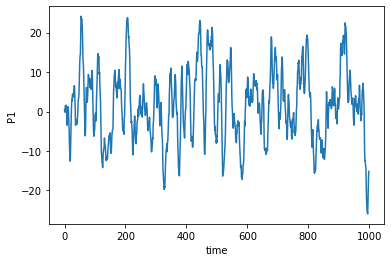

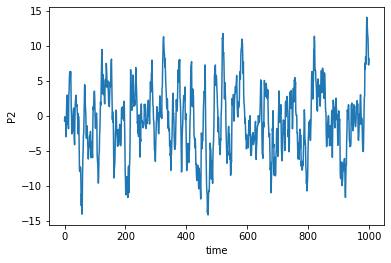

In [8]:
# Plot variables 

import pandas as pd
from matplotlib import pyplot as plt


print('plotting time series from variables')

plt.plot(data.P1.values) #array[:,1])
plt.ylabel('P1')
plt.xlabel('time')
plt.show()

plt.plot(data.P2.values)
plt.ylabel('P2')
plt.xlabel('time')
plt.show()


# Choose main variables: 
# we take denivelation, steps, pulse, roadbike 
# we want to predict knee pain for next days 



# Distributions of data values

One may also want to plot distributions of time-series instead of sequence of time-series in time. Distributions may reveal other data properties.

For the sake of checking basic hypothesis of bell-like distributions, we may also check whether it is matching Gaussian distribution.


1.6710384513354188
1.6235402257251832


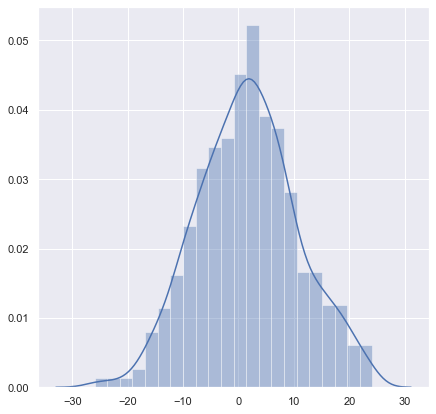

In [9]:
import seaborn as sns, numpy as np
sns.set()

f, ax = plt.subplots(figsize=(7, 7))
#ax.set( yscale="log")
ax = sns.distplot(data.P1.values)


print(np.mean(data.P1.values))
print(np.median(data.P1.values))

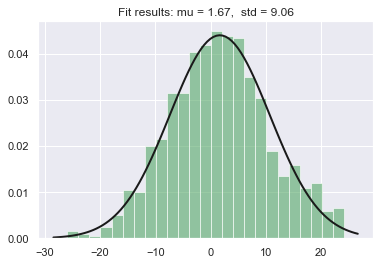

In [24]:
# fitting function 

from datetime import datetime
from geopy.distance import geodesic
import numpy as np
import math
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(variable)

# Plot the histogram.
plt.hist(variable, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

-0.04897667367755136
-0.05556251363731268


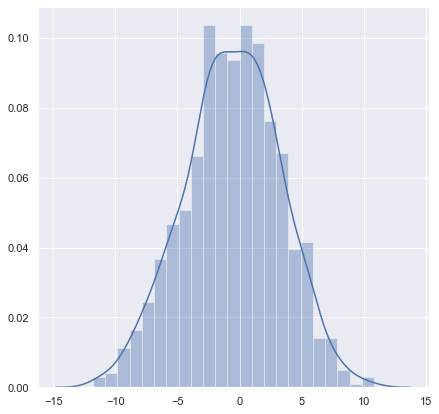

In [27]:
import seaborn as sns, numpy as np
sns.set()

f, ax = plt.subplots(figsize=(7, 7))
#example of other dataset, which may have some outliers - details are not shown 
ax = sns.distplot(array[:,1])


print(np.mean(array[:,3]))
print(np.median(array[:,3]))


# Alternative ways to visualise data 
Alternatively to visualising data as time-series, we can present them also as **distance matrices**, or recurrence plots. This can also highlight some similarities in data time-series for different variables. For definitions go to notebook `distance matrix `.

$M_{ij} = (P(t_i)-P(t_j))$

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Calculate distance matrix 

def distance_matrix(time_series):
    '''
    input: time-series to which we calculate time_series(t_i) - time_series(t_j)
    output: distance matrix plotted in grey scales
    '''
    
    Time = len(time_series)
    
    dist_mat = np.zeros((Time, Time))
    
    for ind in range(0,Time):
        for knd in range(0,Time): #loop through all values
            dist_mat[ind,knd] = (time_series[ind] - time_series [knd]) # can be also absolute value
    
    return dist_mat

<Figure size 640x480 with 0 Axes>

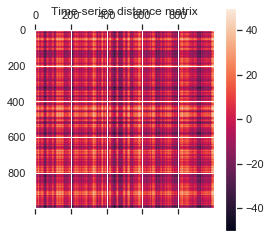

In [32]:


dist_mat_pain = distance_matrix(data.P1.values)

fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#plt.figure(figsize=(40,40))
plt.matshow(dist_mat_pain)
plt.colorbar()
plt.title('Time-series distance matrix')
plt.show()




Sometimes time-series may look less homogeneous.

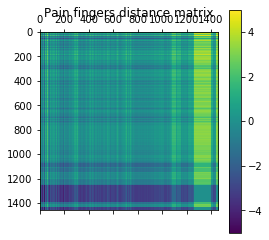

In [24]:


dist_mat_fing = distance_matrix(array[:,4])

plt.matshow(dist_mat_fing)
plt.colorbar()
plt.title('Other time-series distance matrix')
plt.show()




# 3. Moving average (MA) calculation for time-series  <a name="moveav"></a>

1. Why do we need rolling mean? Because we sometimes there are some missing values in time-series, which may lead to missleading results when used in further prediction modules, etc. 
2. For calculating rolling mean for time-series in python is `rolling_mean`
3. Be careful since MA can actually kill some important outliers.

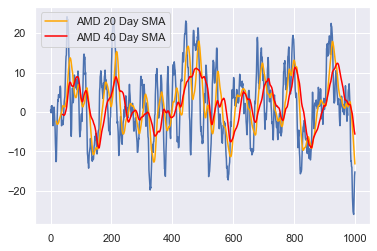

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p

ticker = 'AMD'
timeframe = '1y'

plt.plot(data.P1.values)

rolling_mean = data.P1.rolling(window=20).mean()
rolling_mean40 = data.P1.rolling(window=40).mean()

#rolling_mean2 = data.kneePain.rolling(window=50).mean()plt.plot(df.ds, df.y, label='AMD')
plt.plot(rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(rolling_mean40, label='AMD 40 Day SMA', color='red')
#plt.plot(rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

# 4. Seasonality in time-series  <a name="trend"></a>


Next, let’s  explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality

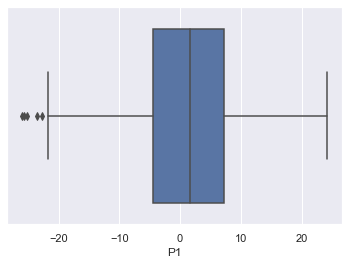

In [35]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p
import seaborn as sns


#fig, ax = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
sns.boxplot(x = data["P1"]) #sns.boxplot(data=data, y='kneePain', ax=ax)

#ax.set_ylabel('data')
#ax.set_title('P1 variable')
# Remove the automatic x-axis label from all but the bottom subplot
#if ax != axes[-1]:
#    ax.set_xlabel('')




# Frequency 


When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas. For example, one can use the date_range() function to create a sequence of uniformly spaced dates from X date through Y date at daily frequency.

Frequency, e.g. daily vs.weekly allows us to resample data also easier. 

In our case this analysis is not applicable since we have homogeneous temporal patterns, but we still put example of the code. 

In [ ]:
# Start and end of the date range to extract
start, end = 0, 1000 #or date format '2017-06'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()

data_weekly = data.P1.rolling(window=7).mean()
#data_weekly = week_mean(data.P1) #function to compute weekly average


ax.plot(data.loc[start:end, 'P1'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly.loc[start:end, 'P1'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Frequency')
ax.legend();

# 5. Trends  <a name="moveav"></a>
Finding and highlighting trends in data is important.
One can use different models, which can identify trends in data. 
Methods of detecting trends and seasonality: 
1. using linear regression models (if you have hypothesis that there must be some logic behind);
2. using Fourier transforms

Alternatively one can use built-in modules, such as `seasonal_decompose` from `statsmodels`. In this case Here, we assume that the model is additive: the value of our variable is given by the summation of the components above:

$Y(t)=level + trend + seasonality + noise$

`seasonal_decompose` takes as an input pandas dataframe, or one subcolumn of dataframe, e.g. in our case data.P1. Variable must be a pandas object with a timeseries index with a freq not set to None


**Comment:** one needs to be careful here when you have very noisy data without any seasonality properties.

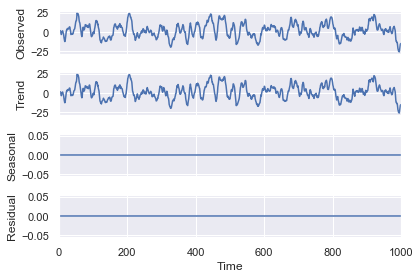

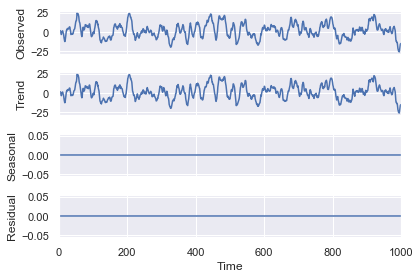

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series



result = seasonal_decompose(data.P1.values, model='additive', freq=1)
result.plot()

The previous time-series look a bit less "trendy". So lets generate some with clear trend but maybe without any seasonality.

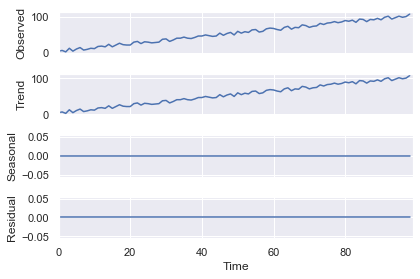

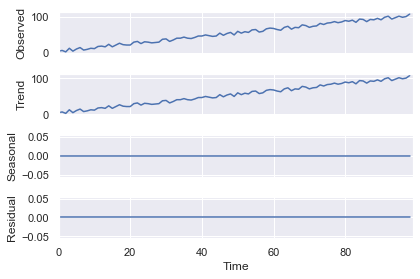

In [53]:


series = [i+randrange(10) for i in range(1,100)]
result_ser = seasonal_decompose(series, model='additive', freq=1)
result_ser.plot()

If we would have some seasonality in our data, e.g. it would be dependent on cold weather, or allergy depending on the time of some flowers blooming, we could then extract seasonality.

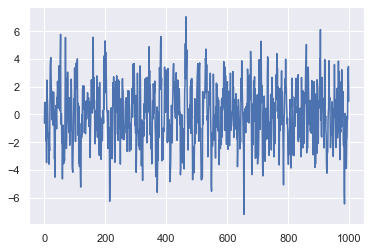

In [56]:
import numpy as np
x=data.P1-result.seasonal
diff=np.diff(x)
plt.plot(diff)

# 5. Autocorrelation <a name="autocor"></a>

We make the first simple test on some memory effects in our data.
For the autocorrelation one needs to choose maximum time-lag on which you will shift your data, e.g. $<P(t),P(t-\Delta t)>.$

The main idea is that if process has fast decaying autocorrelation function, it is less likely to have any memory effects.

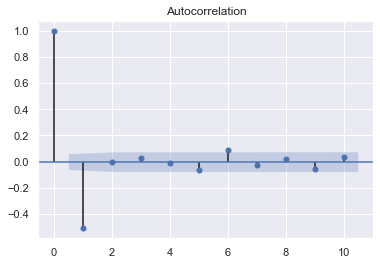

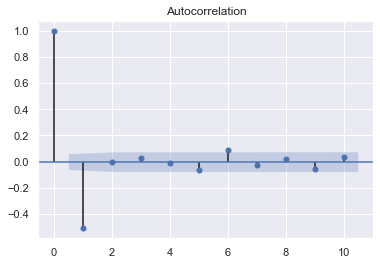

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
#example of data with trend

y =  [i + randrange(10) for i in range(0,1000)] 
diff=np.diff(y)

plot_acf(diff, lags=10)

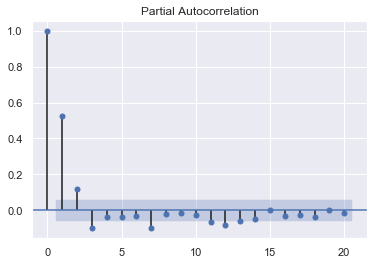

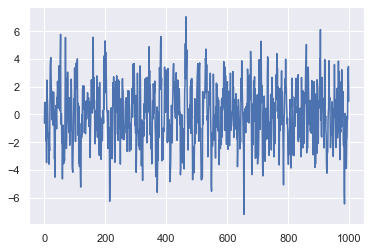

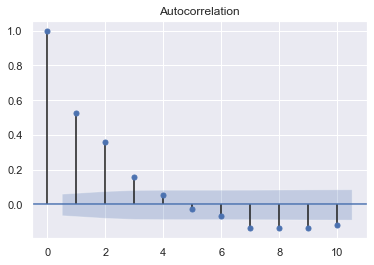

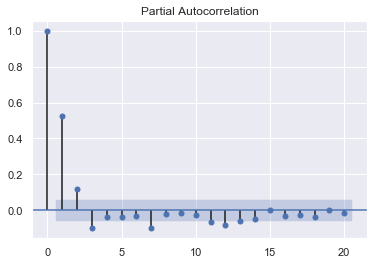

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

x=data.P1-result.seasonal
diff=np.diff(x)
plt.plot(diff)



x = [i + ran]
plot_acf(diff, lags=10)
plot_pacf(diff, lags=20)

# 6. Correlations  vs. causality <a name="correlation"></a>

First before even considering any measures for correlation let us just simply play with different variables in our data and plot them one across the other and see whether we see any eye-seen correlations. 

## Correlation 

Since we work here with randomly generated time-series data from AR(t) models 
$
\boldsymbol{\mu}_t = b ~ x_{t-1}~,
$
we may anticipate some correlation patterns between $AR_1(t)$ and $AR_2(t)$ while for real data this is not that obvious.

**Comment:** be careful, since our eyes may see trends and correlations somewhere where there is just coinsidential co-ocurrence. For distinguishing those we would need to introduce some statistical measurues. 
We will start with autocorrelation.




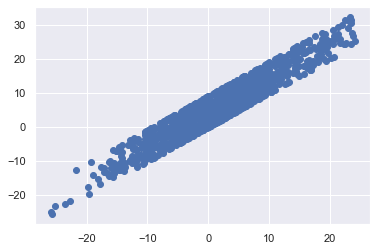

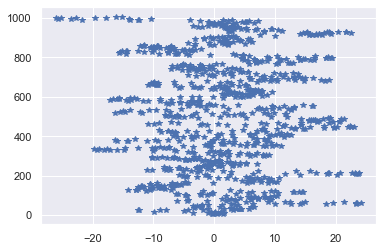

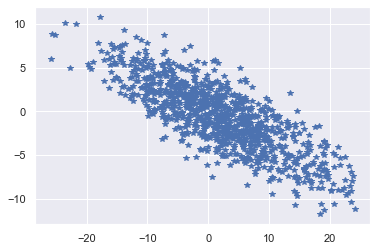

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#size = 1000
x = data.P1.values
y = (data.P1.values) + [randrange(10) for i in range(0,1000)] # randomly induced noise
z = [i + randrange(10) for i in range(0,1000)]#data.P3.values
w = data.P2.values
#z = y + np.random.normal(size=size)
#X = pd.DataFrame({'x': x, 'y': y, 'z': z})

plt.plot(x,y,'o')
plt.show()

plt.plot(x,z,'*')
plt.show()

plt.plot(x,w,'*')
plt.show()

# Causality measure 

There is something, which is not captured by correlation plots however.
From the pictures, you’d never know that Y can explain away X’s effect on Z. This won’t be obvious until we start doing regression analysis. 

There are ways to deal with that, e.g. with applying, so-called **Granger causality measures** between two time-series $P_1(t)$ and $P_2(t)$.
For more details on python implementation and the documentation and source code of the grangercausalitytests method of the statsmodels Python package https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html#grangercausalitytests and here https://towardsdatascience.com/inferring-causality-in-time-series-data-b8b75fe52c46 


The results of Granger causality are 
$\sigma_v$ - the estimate of the error variance.
$c_i$ -the estimate of the autoregressive coefficients for a model including
        nlags.
$p_i$- the partial autocorrelation function.
 $\sigma_i$ - the entire sigma array from intermediate result, last value is sigma_v.
    $\phi$ -the entire phi array from intermediate result, last column contains
        autoregressive coefficients for AR(nlags).
        
**Comment** Importantly we need to give dataframe of two variables only to the Granger causality (it is pair-wise).


In [99]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np


'''
 the estimate of the error variance.
    arcoefs : ndarray
        The estimate of the autoregressive coefficients for a model including
        nlags.
    pacf : ndarray
        The partial autocorrelation function.
    sigma : ndarray
        The entire sigma array from intermediate result, last value is sigma_v.
    phi : ndarray
        The entire phi array from intermediate result, last column contains
        autoregressive coefficients for AR(nlags).


'''

'\n the estimate of the error variance.\n    arcoefs : ndarray\n        The estimate of the autoregressive coefficients for a model including\n        nlags.\n    pacf : ndarray\n        The partial autocorrelation function.\n    sigma : ndarray\n        The entire sigma array from intermediate result, last value is sigma_v.\n    phi : ndarray\n        The entire phi array from intermediate result, last column contains\n        autoregressive coefficients for AR(nlags).\n\n\n'

In [93]:
data = pd.read_csv(filepath, error_bad_lines=False, quotechar=',') #field delimiter is ','  new line "\n"
#
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [96]:
data_rand = data.iloc[:,0:2]
data_rand.head()

,P1,P2
0,0.496714,1.399355
1,-0.138264,0.924634
2,0.647689,0.059630
3,1.523030,-0.646937
4,1.102837,1.688769


In [98]:

maxlag = 10
sigma, arcoefs, pacf, sigma, phi =  grangercausalitytests(data_rand, maxlag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3445.9858, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=3456.3653, p=0.0000  , df=1
likelihood ratio test: chi2=1493.6144, p=0.0000  , df=1
parameter F test:         F=3445.9858, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1054.5713, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=2119.7627, p=0.0000  , df=2
likelihood ratio test: chi2=1136.8394, p=0.0000  , df=2
parameter F test:         F=1054.5713, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=673.1964, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=2033.8691, p=0.0000  , df=3
likelihood ratio test: chi2=1108.5183, p=0.0000  , df=3
parameter F test:         F=673.1964, p=0.0000  , df_denom=990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=505.2677, 

ValueError: too many values to unpack (expected 5)